In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 보스턴 주택 가격 데이터셋 불러오기
from keras.datasets import boston_housing
(train_data, train_labels),(test_data,test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
# Standard Scaling을 통해 데이터의 크기를 맞추어 특정 데이터가 다른 데이터에 영향을 미치지 못하게 하기 위함
# ㄴz-score라고 부르는 데이터를 통계적으로 표준정규분포화시켜 스케일링하는 방식
# ㄴ데이터의 평균은 0, 표준편차가 1이 되도록 스케일링 함
mean = train_data.mean(axis=0)

In [6]:
train_data = train_data - mean # train_data -= mean과 동일한 표현

In [7]:
# 표준편차 계산
std = train_data.std(axis=0) # 표준편차 구하는 메소드

In [8]:
train_data = train_data / std

In [9]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [11]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [12]:
# 신경망 만들기
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1)) # 추론한 값 그 자체가 나오는 것이기 때문에 1로 작성하고 활성함수는 항등함수가 기본값이 됨됨 

    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    
    return model

In [13]:
# k-folder 검증
k = 4

num_val_samples = len(train_data) // k # 폴더의 사이즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #',i)

    # 검증 데이터 준비 : k번째 분할
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] # 검증용 데이터
    val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples] # 검증용 데이터의 라벨
    
    # 훈련 데이터 준비 : 
    partial_train_data = np.concatenate(       # numpy 기능인 concatenate를 통해 묶음 처리
        [train_data[ : i * num_val_samples],
        train_data[(i+1) * num_val_samples: ]], axis=0) # axis로 축 지정

    # 훈련 데이터 라벨 준비 :
    partial_train_labels = np.concatenate(       # numpy 기능인 concatenate를 통해 묶음 처리
        [train_labels[ : i * num_val_samples],
        train_labels[(i+1) * num_val_samples: ]], axis=0) # axis로 축 지정

    model = build_model()
    model.fit(partial_train_data,
              partial_train_labels,
              epochs=20,
              batch_size=1,
              #verbose=0 --> 불필요한 시스템 메시지 안 보고 싶으면 사용
              )
    
    val_mse, val_mae = model.evaluate(val_data, val_labels,#verbose=0
                                      )
    all_scores.append(val_mae)
    
    print(i, (i+1)*num_val_samples)

처리중인 폴드 # 0
Epoch 1/20
303/303 [==============================] - 3s 2ms/step - loss: 201.4545 - mae: 10.8014
Epoch 2/20
303/303 [==============================] - 1s 2ms/step - loss: 32.0853 - mae: 3.8109
Epoch 3/20
303/303 [==============================] - 1s 2ms/step - loss: 22.4459 - mae: 3.1247
Epoch 4/20
303/303 [==============================] - 1s 2ms/step - loss: 18.8584 - mae: 2.8846
Epoch 5/20
303/303 [==============================] - 1s 2ms/step - loss: 17.7375 - mae: 2.7231
Epoch 6/20
303/303 [==============================] - 1s 2ms/step - loss: 15.7193 - mae: 2.6093
Epoch 7/20
303/303 [==============================] - 1s 2ms/step - loss: 14.4087 - mae: 2.5379
Epoch 8/20
303/303 [==============================] - 1s 2ms/step - loss: 13.2466 - mae: 2.4843
Epoch 9/20
303/303 [==============================] - 1s 2ms/step - loss: 12.6159 - mae: 2.4184
Epoch 10/20
303/303 [==============================] - 1s 3ms/step - loss: 12.5338 - mae: 2.3807
Epoch 11/20
303/303 [====

In [14]:
all_scores

[2.2390291690826416, 2.6024012565612793, 2.574549674987793, 3.0892720222473145]

In [15]:
np.mean(all_scores)

2.626313030719757

In [16]:
# k-folder 검증
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k # 폴더의 사이즈즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #',i)

    # 검증 데이터 준비 : k번째 분할
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] # 검증용 데이터
    val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples] # 검증용 데이터의 라벨
    
    # 훈련 데이터 준비 : 
    partial_train_data = np.concatenate(       # numpy 기능인 concatenate를 통해 묶음 처리
        [train_data[ : i * num_val_samples],
        train_data[(i+1) * num_val_samples: ]], axis=0) # axis로 축 지정

    # 훈련 데이터 라벨 준비 :
    partial_train_labels = np.concatenate(       # numpy 기능인 concatenate를 통해 묶음 처리
        [train_labels[ : i * num_val_samples],
        train_labels[(i+1) * num_val_samples: ]], axis=0) # axis로 축 지정

    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_labels,
                        epochs=num_epochs,
                        batch_size=1,
                        validation_data=(val_data,val_labels), # fit 과정에서 검증까지 하는 과정정
                        verbose=0
                        )
    mae_history = history.history['mae']

    all_scores.append(mae_history)
    
    print(i, (i+1)*num_val_samples)

처리중인 폴드 # 0
0 101
처리중인 폴드 # 1
1 202
처리중인 폴드 # 2
2 303
처리중인 폴드 # 3
3 404


Text(0, 0.5, 'Validation MAE')

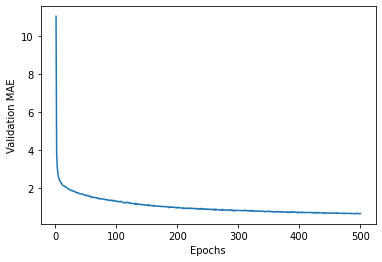

In [17]:
# 시각화
# 데이터 취합 및 사전 준비
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')